In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the dataset into a pandas dataframe
loans = pd.read_csv("../data/loan_approval_raw.csv")
loans.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [ ]:
# summarize dataset info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [ ]:
# compare approved/not approved proportions
loans["loan_approved"].value_counts(normalize=True)

loan_approved
False    0.5605
True     0.4395
Name: proportion, dtype: float64

In [ ]:
# compare approved/not approved mean values for numeric features
numerical_variables = ["income", "credit_score", "loan_amount", "years_employed", "points"]
mean_by_target = loans.groupby("loan_approved")[numerical_variables].mean().round(2)
mean_by_target

,income,credit_score,loan_amount,years_employed,points
loan_approved,,,,,
False,83317.46,472.2,27293.98,19.35,43.13
True,99855.61,703.7,22776.40,21.83,73.96


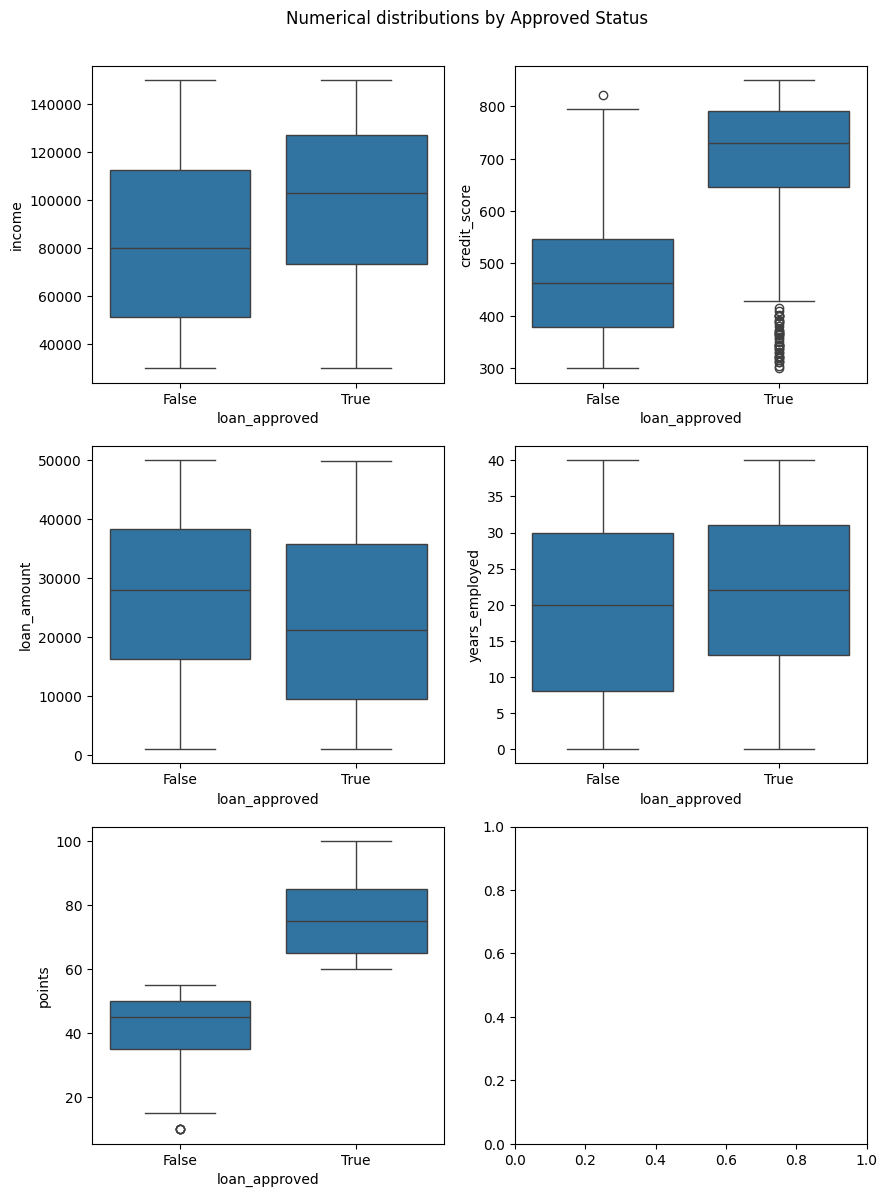

In [ ]:
# visualize approved/notapproved distributions for numeric features
fig, ax = plt.subplots(3, 2, figsize=(10, 14))
fig.suptitle("Numerical distributions by Approved Status", y=0.92)
for i, variable in zip(np.arange(0, 6), numerical_variables):
    sns.boxplot(data=loans, x="loan_approved", y=variable, ax=ax.flatten()[i])

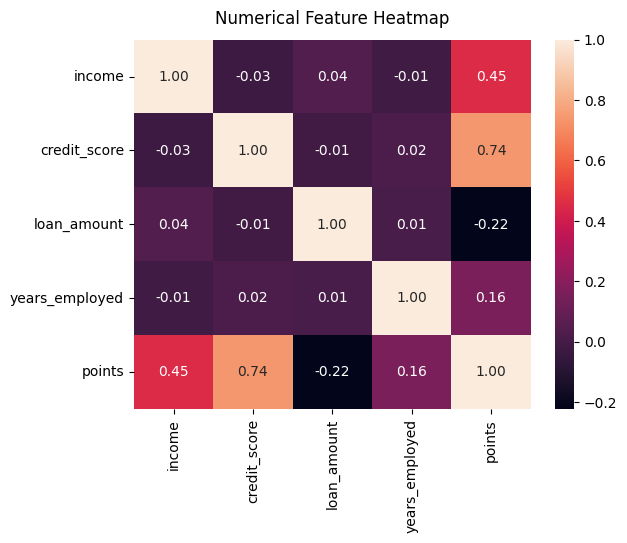

In [ ]:
# visualize numeric feature correlations
sns.heatmap(loans[numerical_variables].corr(), annot=True, fmt=".2f")
plt.title("Numerical Feature Heatmap", y=1.02);